Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

Name: Kayla Kim 

In [72]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import scipy.special
import matplotlib.pyplot as plt

# Midterm - Fall Semester 2022

Guidelines:
1. Use resources available to you from class and online.
1. That being said this is an individual effort, do not work with others and cite what you do use.
1. Copying is prohibited, write your own code and solutions.
1. Do not use edstem for the duration of the exam, it will be frozen!  
1. If you have a question please email the instructor and the TAs for maximal response possibilities.  We will answer questions that pertain only to clarification.  In particular this means we will not debug your code.
1. Late turn in of the midterm will result in a 10% reduction every HOUR that it is late.  If you feel that there is a special circumstance that warrants consideration tells us as soon as possible (and more so before the exam starts).

Good luck!

## Question 1

A farmer has a circular field, a pole, a rope and a goat.  She places the pole in the ground at the edge of the field and ties the rope to the pole and the goat such that the goat is able to eat the grass on exactly half the field.

**(a)** (15) Given the radius of the field, derive the equations that need to be solved to find the length of the rope needed.  Feel free to use resources on the web but make sure to fully justify what you are using and what the source of the information is.

YOUR ANSWER HERE

Using the equation of $\href{https://mathworld.wolfram.com/Circle-CircleIntersection.html}{\textrm{circle to circle intersection}}$, we can find the area of intersection between the field ($C_f$) and the circle in which the goat is allowed to eat the grass ($C_g$). 

The area of intersection $A_{intersection}$ is given by

$$
    A_{intersection} = r^2 cos^{-1}\left(\dfrac{d^2+r^2-R^2}{2dr}\right) + R^2 cos^{-1}\left(\dfrac{d^2+R^2-r^2}{2dR}\right)-\dfrac{1}{2} \sqrt{(-d+r+R)(d+r-R)(d-r+R)(d+r+R)}
$$

where $R$ is the radius of the circular field $C_f$, $r$ is the radius of the goat's circle ($C_g$), and $d$ is the distance between the center of $C_f$ and $C_g$. 

Since the pole that ties the goat lies on the edge of the field, we know $R=r$. As such, the area of intersection becomes 

$$
    A_{intersection} = r^2 cos^{-1}\left(\dfrac{r}{2R}\right) + R^2cos^{-1}\left(\dfrac{2R^2 - r^2}{2Rr}\right) - \dfrac{1}{2}\sqrt{r^2(2R-r)(2R+r)}
$$

We want $A_{intersection} = \dfrac{1}{2} A_{C_f} = \dfrac{\pi R^2}{2}$, so given the radius of $C_f$, $R$, we can find $r$ such that

$$
    \dfrac{\pi R^2}{2} = r^2 cos^{-1}\left(\dfrac{r}{2R}\right) + R^2cos^{-1}\left(\dfrac{2R^2 - r^2}{2Rr}\right) - \dfrac{1}{2}\sqrt{r^2(2R-r)(2R+r)} 
$$

Equivalently, we can solve for the roots of the equation such that

$$
    r^2 cos^{-1}\left(\dfrac{r}{2R}\right) + R^2cos^{-1}\left(\dfrac{2R^2 - r^2}{2r^2}\right) - \dfrac{1}{2}\sqrt{r^2(2R-r)(2R+r)} -  \dfrac{\pi R^2}{2} = 0 
$$
using Newton's method: $\href{https://github.com/mandli/intro-numerical-methods/blob/master/05_root_finding_optimization.ipynb}{\textrm{Lecture Notes for Newton's}}$ 

**(b)** (10) Write a function that takes a radius and returns the length of rope.  Make sure to handle appropriate limiting conditions.

In [121]:
# Based on code for Newton's Method in Root-Finding/Optimization Lecture Notes

def goat_leash(r):
    """Given the radius of the field compute the length of rope needed.
    
    :Input:
     - *r* (float) Radius of field

    :Output:
     - (float) Length of rope
    """
    # YOUR CODE HERE
    MAX_STEPS = 1000 
    tolerance = 1.e-7
    
    r = r
    A = lambda L, r=r: L**2 * numpy.arccos(L / (2 * r)) + r**2 * numpy.arccos((2 * r**2 - L**2) / (2 * r**2)) - numpy.sqrt(L**2 * (2 * r - L) * (2 * r + L)) / 2 - (numpy.pi * r**2 / 2)
    A_prime = lambda L, r=r: 2 * L * numpy.arccos(L / (2 * r)) - (L**2 / numpy.sqrt(4 * r**2 - L**2)) + ( r**2 * (2 * r**2 + L**2) ) / ( L * numpy.sqrt(-4 * r**4 + 8 * L**2 * r**2 - L**4)) - ( 2 * r**2 - L**2 ) / ( numpy.sqrt((2 * r - L) * (2 * r + L)) )
#     A = lambda L, r=r: (r**2 * numpy.arccos((2*r**2 - L**2)/(2*r**2))) + (L**2 * numpy.arccos(L/2*r)) - 2 * r**2 * L**2 - (L**4 / 2)
#     A_prime = lambda L, r=r: (2*r**2 - L**2)/(numpy.sqrt(4*r**2 - L**2)) + 2 * L * numpy.arccos(L / 2*r) - 4*L*r**3 - 2*L**3
    
#     n = 0    
    if r > 0.0:
        L0 = r
        L = L0
        L_array = [ L0 ]

        for k in range(1, MAX_STEPS + 1):
            L = L - A(L) / A_prime(L)
            L_array.append(L)
#             n += 1
            if numpy.abs(A(L)) < tolerance:
#                 n -= 1
                break 

#         print(n)
        if k == MAX_STEPS:
            print('Maximum number of steps exceeded')
    else:
        L = r #since if r = 0, L = 0 

    return L

In [9]:
%precision 16
L = numpy.zeros(5)
for (i, r) in enumerate(numpy.array([0.0, 1.0, 4.0, 10.0, 20.0])):
    L[i] = goat_leash(r)
    print(r, L[i])
numpy.testing.assert_allclose(L, [0.0, 1.1587284728884697, 4.6349138915538788, 11.5872847300488502, 23.1745694603887387])
print("Success!")

0.0 0.0
1.0 1.1587284711955173
4.0 4.634913884782069
10.0 11.587284729611737
20.0 23.174569459223473
Success!


**(c)** (10) Confirm your result by plotting the relevant geometry (e.g. the field relative to the reach of the goat).

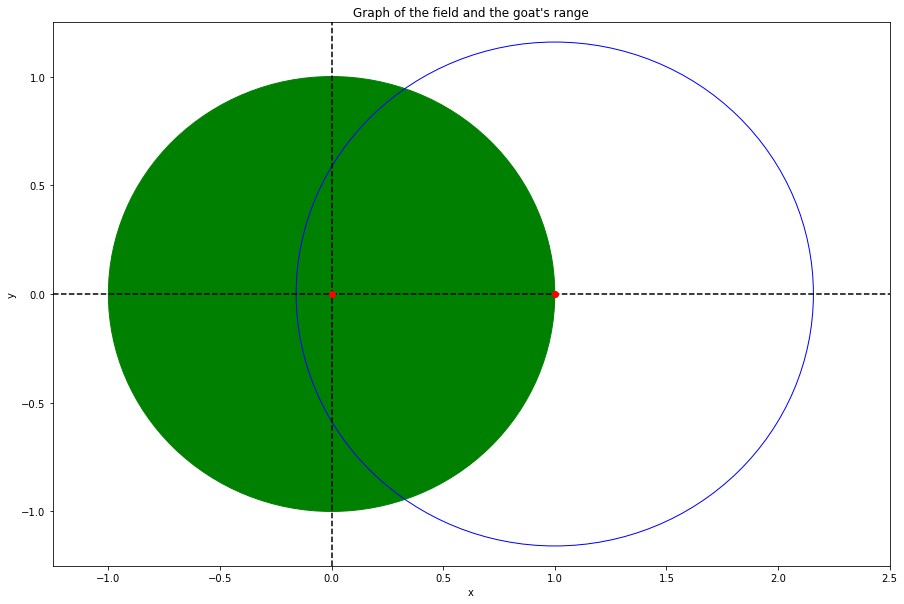

In [105]:
# YOUR CODE HERE
# plot of field/goat circles, for radius of field = 1
# field is centered at 0

fig = plt.figure(figsize =(15,10))

field = plt.Circle((0, 0), 1, color = 'g')
goat = plt.Circle((1, 0), 1.1587284711955173, color = 'b', fill = False)

axs = plt.gca()
axs.cla()

axs.set_xlabel("x")
axs.set_ylabel("y")
axs.set_title("Graph of the field and the goat's range")

axs.set_xlim([-1.25, 2.5])
axs.set_ylim([-1.25, 1.25])

axs.add_patch(field)
axs.add_patch(goat)

plt.axvline(x=0, c="black", linestyle='--')
plt.axhline(y=0, c="black", linestyle='--')

plt.plot((0,0), 'ro')

plt.show()

## Question 2

(25) Find the parameters $p$ that minimize
$$
    \int^\pi_0 \sin x \cos p x dx.
$$
Make sure to plot your result to check the validity of what you found and comment on what you find.

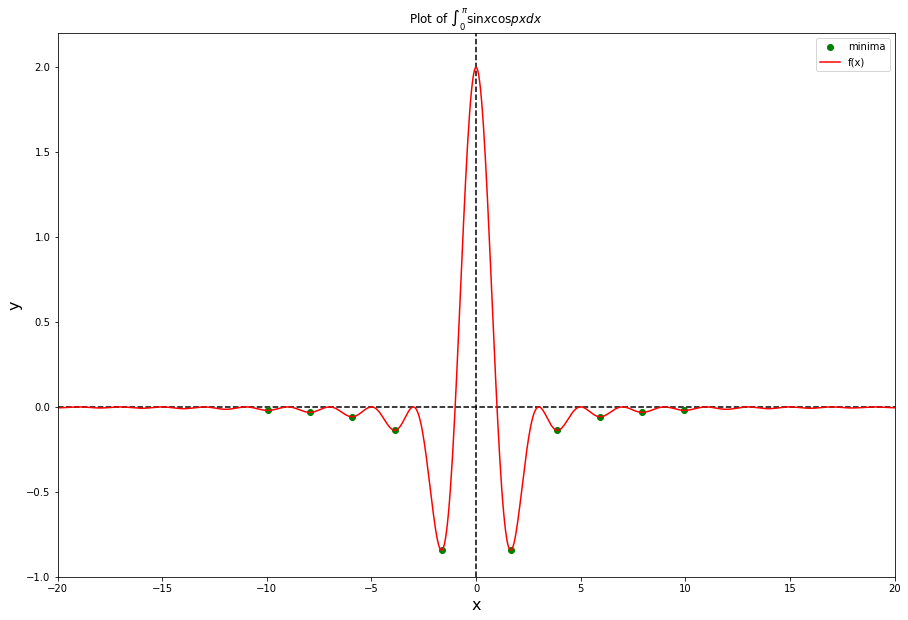

In [70]:
# YOUR CODE HERE

x = numpy.linspace(-24, 24, 1000)
# print(x)
y = -(numpy.cos(numpy.pi*x)+1)/(x**2-1)
# print(y)
fig = plt.figure(figsize =(15,10))
axes = fig.add_subplot(1,1,1)

axes.set_xlabel("x", fontsize=16)
axes.set_ylabel("y", fontsize=16)
axes.set_title("Plot of $\int^\pi_0 \sin x \cos p x dx$")

axes.set_xlim(-20, 20)
axes.set_ylim(-1, 2.2)

plt.axvline(x=0, c="black", linestyle='--')
plt.axhline(y=0, c="black", linestyle='--')

plt.plot([1.6521885, 3.8895484, 5.9299382, 7.9483050, 9.958947], [-0.844125, -0.137339, -0.0578347, -0.0319553, -0.020286], 'go', label='minima')
plt.plot([-1.6521885, -3.8895484, -5.9299382, -7.9483050, -9.958947], [-0.844125, -0.137339, -0.0578347, -0.0319553, -0.020286], 'go')

line, = plt.plot(x, y, 'r')
line.set_label('f(x)')

axes.legend()
plt.show()

YOUR ANSWER HERE

Given $f(x) = \int^\pi_0 \sin x \cos p x dx$, first we calculate the integral keeping $p$ as a constant, which gives us 

\begin{equation}
\begin{split}
    f(x) &= \frac{psin(x)sin(px) + cos(x)cos(px)}{p^2-1} \\
    &= -\frac{cos((p+1)x)}{2(p+1)} - \frac{cos((1-p)x)}{2(1-p)} \\
    &= -\frac{cos(\pi p) +1}{p^2 -1}
\end{split}
\end{equation}

Then we find the derivative of $f(x)$ in terms of $p$ (i.e. $\frac{df}{dp}$) in order to solve for the critical points:

\begin{equation}
\begin{split}
    \frac{df}{dp} &= \dfrac{\pi sin(\pi p)(p^2 -1)-(-cos(\pi p) -1)(2p)}{(p^2-1)^2} \\
    &= \frac{\pi(p^2-1)sin(\pi p) -2p(-cos(\pi p) -1)}{(p^2-1)^2} \\
    &= \frac{\pi sin(\pi p)}{p^2-1} - \dfrac{2p(-cos(\pi p) -1)}{(p^2-1)^2} \\
\end{split}
\end{equation}

Setting $\dfrac{df}{dp} = 0$: 

$$
    \frac{df}{dp} = \dfrac{\pi sin(\pi p)}{p^2-1} - \dfrac{2p(-cos(\pi p) -1)}{(p^2-1)^2} = 0
$$

we can find the local minima at

$$
    p \approx \pm 1.6521885 \text{ where } f(x) = -0.844125, \\
    p \approx \pm 3.8895484 \text{ where } f(x) = -0.137339, \\
    p \approx \pm 5.9299382 \text{ where } f(x) = -0.0578347, \\
    p \approx \pm 7.9483050 \text{ where } f(x) = -0.0319553, \\
    p \approx \pm 9.958947 \text{ where } f(x) = -0.020286, \\
$$
and so on. This corresponds with the values for the local minima in the graph. 

## Question 3

The equation for an ellipse is $x^2/a^2 + y^2/b^2=1$.  The circumference of the ellipse can be computed using

$$S = 2 \int^a_{-a} \sqrt{1 + (\text{d}y/\text{d}x)^2} dx.$$

**(a)** [10] One way to compute the circumference is to use a series due to Ivory and Bessel (you can find the original papers online which may be worth a look).  One way to write this series is

$$S = \pi (a + b) \sum^{\infty}_{n=0} \left(\begin{aligned} 0.5 \\ n~~ \end{aligned} \right)^2 h^n ~~~~~ \text{with} ~~~~~~ h = \frac{(a - b)^2}{(a+b)^2}$$

where $\left(\begin{aligned} 0.5 \\ n~~ \end{aligned} \right)$ is the binomial coefficient which can be computed via a `scipy` function.  Write a function to compute this series to a point where the difference between the partial sums is less than $\epsilon_{\text{machine}}$.

In [106]:
def S_exact(a, b):
    # YOUR CODE HERE
    # https://www.imsc.res.in/~rao/ramanujan/CamUnivCpapers/Cpaper6/page1.htm
    
    h = (a - b)**2 / (a + b)**2 
    sum = 0
    for n in range(100):
        sum1 = scipy.special.binom(0.5, n)**2 * h**n 
        sum += sum1
        if(abs(numpy.pi * (a + b) * sum1) < numpy.finfo(float).eps):
            break
    S = numpy.pi * (a + b) * sum
    
    return S

In [107]:
def S_approx(a, b):
    """Approximate the circumference of an ellipse specified by a and b
    
    This approximation is h^5 order accurate and based on the work of Ramanujan [1]
    
    1. Ramanujan, Srinivasa, (1914). "Modular Equations and Approximations to \pi". Quart. J. Pure App. Math. 45: 350-372.
    """
    h = (a - b)**2 / (a + b)**2
    return numpy.pi * (a + b) * (1.0 + (3.0 * h)/ (10.0 + numpy.sqrt(4.0 - 3.0 * h)))


a = 1.0
b = 2.0
numpy.testing.assert_allclose(S_exact(a, b), S_approx(a, b))
print("Success!")

Success!


**(b)** [10] Derive an expression for the integrand, implicit differentiation may be useful.

YOUR ANSWER HERE

Starting with the equation $\dfrac{x^2}{a^2} + \dfrac{y^2}{b^2} = 1$, differentiating both sides gives us:

\begin{equation}
\begin{split}
    \frac{d(\frac{x^2}{a^2})}{dx} + \frac{d(\frac{y^2}{b^2})}{dx} &= 0 \\
    \frac{2x}{a^2} + \frac{(\frac{y^2}{b^2})}{dy} \frac{dy}{dx} &= 0 \\
    \frac{2x}{a^2} + \frac{2y}{b^2} \frac{dy}{dx} &= 0 \\
    \frac{dy}{dx} = \frac{-xb^2}{ya^2} \\
    dy = - \frac{xb^2}{ya^2}dx \\
\end{split}
\end{equation}

Since $y = \pm \sqrt{1 - \dfrac{x^2}{a^2}} \cdot b$, 

\begin{equation}
\begin{split}
    dy = \pm \frac{xb}{\sqrt{a^2 - x^2} \cdot a} dx \\
\end{split}
\end{equation}

Plugging back into $S = 2 \int^a_{-a} \sqrt{1 + (\text{d}y/\text{d}x)^2} dx$, solving $S$ in terms of $a$ gives us  

\begin{equation}
\begin{split}
    S = 2 \int^a_{-a} \sqrt{\frac{a^4 - a^2x^2 + b^2x^2}{a^4 - a^2x^2}} dx
\end{split}
\end{equation}

**(c)** [20] Finally, write a function that computes the integral to a given tolerance.  Note that this may converge very slowly so use a high enough order quadrature rule so that the computation takes less than a minute to do (this will result in an error otherwise).  If the integration does not succeed raise a `ValueError`.

In [119]:
# Code based on examples from Quadrature Lecture Notes (Trapezoidal)
# https://github.com/mandli/intro-numerical-methods/blob/master/08_quadrature.ipynb

def ellipse_circumference(a, b, tolerance):
    # YOUR CODE HERE
    f = lambda x: numpy.sqrt(((a**4) * (1 - x**2) + (a**2) * (b**2) * (x**2)) / ((a**2) * (1 - x**2)))
    S_exact = lambda a, b: 4 * a * scipy.special.ellipe(1 - b**2 / a**2)
    
    num_partitions = 800
    x_hat = numpy.linspace(-1, 1, num_partitions + 1)
    delta_x = x_hat[1] - x_hat[0]
    
    xi_map = lambda a, b, xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi0 = -numpy.sqrt(1.0 / 3.0)
    xi1 =  numpy.sqrt(1.0 / 3.0)
    
    Qf = numpy.zeros(x_hat.shape)
    Qf[0] = ( f(xi_map(x_hat[0], x_hat[1], xi0)) + f(xi_map(x_hat[0], x_hat[1], xi1)) ) * delta_x / 2.0
    
    for i in range(1, num_partitions):
        Qf[i] = Qf[i - 1] + (f(xi_map(x_hat[i], x_hat[i+1], xi0)) + f(xi_map(x_hat[i], x_hat[i+1], xi1))) * delta_x / 2.0
        if(numpy.abs(S_exact(a,b) - 2 * Qf[i]) < tolerance):
            break
    
    S = 2 * Qf[i]
    return S

In [120]:
a = 1.0
b = 2.0
numpy.testing.assert_allclose(ellipse_circumference(a, b, 1e-1), S_approx(a, b), atol=1e-1)
print("Success!")

Success!
